# Systems Cell Bio HW#3  
Professor Gross' section of the course  
Katrina Bartas  
2/17/21

The goal is to model two kinesin motors functioning together. In HW#1 you developed a
simulation for 1 motor. Here, you will stick two such motors together.  
The main goal here: determine how changing the velocity of the motors (i.e. the rate at which
each motor steps) affects the mean travel distance of the group, for two motors. You should
compare these results to the order-of-magnitude theory developed in class. How similar are the
two sets of predictions?  
If different, suggest what might account for the difference.  
Assume that each individual motor has a processivity of 800 nm. What is your prediction for the
mean travel of a cargo with two such motors, assuming a fixed on-rate (probability of binding)
of 2/sec, for mean velocity of 100 nm/sec, 200 nm/sec, 400 nm/sec, and 800 nm/sec?  
Key points:  
a) motors only fall off when they attempt to step,  
b) a ‘run’ of the cargo ends only when both motors detach, assume that when a motor unbinds, it has a constant chance of
rebinding in subsequent turns (determined by its on-rate) and that when it rebinds, it binds exactly at the location of the bound motor.  
As well as the mean travel (with 95% CI) also show distributions of run-lengths for the different velocity conditions.

The results from the order-of-magnitude theory developed in class are off by over a factor of 2 from the results obtained via simulation for all velocities. But, the trends are similar (meaning that decreases in velocity lead to an increase in run length for both simulation results and order-of-magnitude theory results).  
  
This difference might be due to the long tail of the distribution (of the simulated data as shown in the histograms) making the mean much larger while the order-of-magnitude theory results assume that runs will end after the calculated number of cycles.  
  
This difference could also be explained by the order-of-magnitude theory treating the motors as independent, while in my simulations, if one motor detaches it will reattach at the location of the other motor. Because of this coupling between the motors in the simulations (and the lack of coupling in the order-of-magnitude theory), the difference between the two sets of results is further enlarged.

In [1]:
#import necessary packages, define variables, define placeholders
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

I based my code for this homework on my code for HW#1 with some modifications.  
I changed the while loop to account for 2 motors being attached or just 1 of the 2 being attached, and within the while loop I made up 3 possible conditions: both motors are attached, motor 1 is attached, or motor 2 is attached.  
Within each condition if statements are carried out depending on random values that determine whether or not things detach, re-attach, or step.  
  
To change the velocities of the individual motors I changed the "MtrStepDecider" threshold values accordingly. Because there are 10,000 timesteps within a second, the threshold to take a step were as follows for the following velocities:  
100 for 800 nm/sec.  
50 for 400 nm/sec.  
25 for 200 nm/sec.  
12.5 for 100 nm/sec.  
  
The processivity for all individual motors remained 800 nm because I did not change thresholds for "MtrDetachDecider".  
Below are histograms of the run lengths for each velocity, and the 95% CI printed above the histograms along with some other information.

average length of time of each run is  2.3835659999999996 seconds
average times reattached per run is  2.09  times.
mean run length is  1760.72 nm
95% CI of run length is  1421.871964742099  and  2099.568035257901  nanometers.


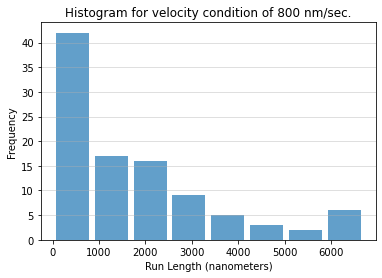

In [2]:
#mean velocity 800 nm/sec for each individual motor
#on-rate is constant
#off-rate is higher if velocity is higher because more steps must be taken in a given period of time
n = 100 # n is the number of runs to simulate
ts = 10000 # ts is the number of time steps in a second
MtrStepDecider = random.randrange(ts) #this will be used to determine if try to step
MtrDetachDecider = random.randrange(ts) #This is used to see if falls off
num_steps=[] #placeholder, empty list
distance_travelled=[] #placeholder, empty list
run_length=[] #placeholder, empty list
velocity=[] #placeholder, empty list
count_attachments=[]
step_size=8
step_thresh=100 # 100 for mean velocity 800 and processivity 800 for individu motor
detac_thresh=100 # 100 for mean velocity 800 and processivity 800 for individu motor
#for loop which runs simulation n times
for i in range(n):  #This is a loop which will go n times
    numtimesteps = 0
    Numsteps = 0
    Numsteps2 = 0
    MtrDetachDecider = 1000  #this makes sure you get into the while loop
    MtrDetachDecider2 = 1000
    count_attach=0
    while MtrDetachDecider >= detac_thresh or MtrDetachDecider2 >= detac_thresh:
        numtimesteps = numtimesteps + 1
        MtrStepDecider = random.randrange (ts)
        MtrStepDecider2 = random.randrange (ts)
        if MtrDetachDecider >= detac_thresh and MtrDetachDecider2 >= detac_thresh: #both motors attached
            if MtrStepDecider <= step_thresh and MtrStepDecider2 <= step_thresh:  #if true, then both motor is attempting to step
                MtrDetachDecider = random.randrange(ts)
                MtrDetachDecider2 = random.randrange(ts)
                if MtrDetachDecider > detac_thresh: 
                    Numsteps = Numsteps + 1
                if MtrDetachDecider2 > detac_thresh: 
                    Numsteps2 = Numsteps2 + 1
            elif MtrStepDecider <= step_thresh and MtrStepDecider2 > step_thresh: #just one will step
                MtrDetachDecider = random.randrange(ts)
                if MtrDetachDecider > detac_thresh: #if either steps i will add a step
                    Numsteps = Numsteps + 1
            elif MtrStepDecider2 <= step_thresh and MtrStepDecider > step_thresh: #just two will step
                MtrDetachDecider2 = random.randrange(ts)
                if MtrDetachDecider2 > detac_thresh: #if either steps i will add a step
                    Numsteps2 = Numsteps2 + 1
        elif MtrDetachDecider >= detac_thresh and MtrDetachDecider2 < detac_thresh: #motor1 attached, motor2 not
            if MtrStepDecider <= step_thresh:  #if true, then motor1 is attempting to step
                MtrDetachDecider = random.randrange(ts)
                if MtrDetachDecider >= detac_thresh:
                    Numsteps = Numsteps + 1
            MtrAttachDecider2 = random.randrange(ts)
            if MtrAttachDecider2 < 2: #2 chances per sec
                count_attach=count_attach+1
                MtrDetachDecider2 = 1000 
                Numsteps2=Numsteps
        else: #motor2 attached, motor1 not
            if MtrStepDecider2 <= step_thresh:  #if true, then motor1 is attempting to step
                MtrDetachDecider2 = random.randrange(ts)
                if MtrDetachDecider2 >= detac_thresh:
                    Numsteps2 = Numsteps2 + 1
            MtrAttachDecider = random.randrange(ts)
            if MtrAttachDecider < 2: #2 chances per sec
                count_attach=count_attach+1
                MtrDetachDecider = 1000 
                Numsteps=Numsteps2
    num_steps.append((Numsteps+Numsteps2)/2) #append num steps for this iteration i to list
    distance_travelled.append((Numsteps+Numsteps2)/2*step_size) #append dist travelled for this iteration i to list
    run_length.append(numtimesteps/10000)
    count_attachments.append(count_attach)
    velocity.append(((Numsteps+Numsteps2)/2*step_size)/(numtimesteps/10000)) #append velocity for this iteration i to list
mean_velocity=np.mean(velocity)
#print("average velocity is ",mean_velocity," nm/sec")
mean_distance=np.mean(distance_travelled)
print("average length of time of each run is ",np.mean(run_length),"seconds")
mean_at=np.mean(count_attachments)
print("average times reattached per run is ",mean_at," times.")
#calculate 95% CI
t = stats.t.ppf(1-((100-95)/2/100), n-1) #calculate t value for this SRS
CIlow=np.mean(distance_travelled)-t*np.std(distance_travelled,ddof=1)/(n**.5)
CIhigh=np.mean(distance_travelled)+t*np.std(distance_travelled,ddof=1)/(n**.5)
print("mean run length is ",mean_distance,"nm")
print("95% CI of run length is ",CIlow," and ",CIhigh," nanometers.")
#make histogram below
m, bins, patches = plt.hist(x=distance_travelled, bins='auto', alpha=0.7, rwidth=0.85) #choose bins automatically
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Run Length (nanometers)')
plt.ylabel('Frequency')
plt.title('Histogram for velocity condition of 800 nm/sec.')
maxfreq = m.max()

In [3]:
#order of magnitude estimate
velocity=800 #nm/s
av_time=800/velocity
off_rate=1/av_time
deltaT=0.5
prob_detac=off_rate*deltaT
prob_end=2*prob_detac
est_cycles=1/prob_end
est_run_length=400*est_cycles
print("According to our back of the envelope calculation the estimated run length for ",velocity," nm/s velocity is ",est_run_length," nm.")

According to our back of the envelope calculation the estimated run length for  800  nm/s velocity is  400.0  nm.


average length of time of each run is  6.897135 seconds
average times reattached per run is  3.9  times.
mean run length is  2698.72 nm
95% CI of run length is  2220.9104386041727  and  3176.529561395827  nanometers.


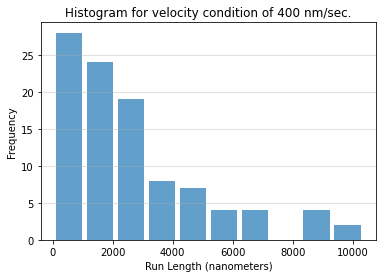

In [4]:
#mean velocity 400 nm/sec for each individual motor
#on-rate is constant
#off-rate is higher if velocity is higher because more steps must be taken in a given period of time
n = 100 # n is the number of runs to simulate
ts = 10000 # ts is the number of time steps in a second
MtrStepDecider = random.randrange(ts) #this will be used to determine if try to step
MtrDetachDecider = random.randrange(ts) #This is used to see if falls off
num_steps=[] #placeholder, empty list
distance_travelled=[] #placeholder, empty list
run_length=[] #placeholder, empty list
velocity=[] #placeholder, empty list
count_attachments=[]
step_size=8
step_thresh=50 # 100 for mean velocity 800 and processivity 800 for individu motor
detac_thresh=100 # 100 for mean velocity 800 and processivity 800 for individu motor
#for loop which runs simulation n times
for i in range(n):  #This is a loop which will go n times
    numtimesteps = 0
    Numsteps = 0
    Numsteps2 = 0
    MtrDetachDecider = 1000  #this makes sure you get into the while loop
    MtrDetachDecider2 = 1000
    count_attach=0
    while MtrDetachDecider >= detac_thresh or MtrDetachDecider2 >= detac_thresh:
        numtimesteps = numtimesteps + 1
        MtrStepDecider = random.randrange (ts)
        MtrStepDecider2 = random.randrange (ts)
        if MtrDetachDecider >= detac_thresh and MtrDetachDecider2 >= detac_thresh: #both motors attached
            if MtrStepDecider <= step_thresh and MtrStepDecider2 <= step_thresh:  #if true, then both motor is attempting to step
                MtrDetachDecider = random.randrange(ts)
                MtrDetachDecider2 = random.randrange(ts)
                if MtrDetachDecider > detac_thresh: 
                    Numsteps = Numsteps + 1
                if MtrDetachDecider2 > detac_thresh: 
                    Numsteps2 = Numsteps2 + 1
            elif MtrStepDecider <= step_thresh and MtrStepDecider2 > step_thresh: #just one will step
                MtrDetachDecider = random.randrange(ts)
                if MtrDetachDecider > detac_thresh: #if either steps i will add a step
                    Numsteps = Numsteps + 1
            elif MtrStepDecider2 <= step_thresh and MtrStepDecider > step_thresh: #just two will step
                MtrDetachDecider2 = random.randrange(ts)
                if MtrDetachDecider2 > detac_thresh: #if either steps i will add a step
                    Numsteps2 = Numsteps2 + 1
        elif MtrDetachDecider >= detac_thresh and MtrDetachDecider2 < detac_thresh: #motor1 attached, motor2 not
            if MtrStepDecider <= step_thresh:  #if true, then motor1 is attempting to step
                MtrDetachDecider = random.randrange(ts)
                if MtrDetachDecider >= detac_thresh:
                    Numsteps = Numsteps + 1
            MtrAttachDecider2 = random.randrange(ts)
            if MtrAttachDecider2 < 2: #2 chances per sec
                count_attach=count_attach+1
                MtrDetachDecider2 = 1000 
                Numsteps2=Numsteps
        else: #motor2 attached, motor1 not
            if MtrStepDecider2 <= step_thresh:  #if true, then motor1 is attempting to step
                MtrDetachDecider2 = random.randrange(ts)
                if MtrDetachDecider2 >= detac_thresh:
                    Numsteps2 = Numsteps2 + 1
            MtrAttachDecider = random.randrange(ts)
            if MtrAttachDecider < 2: #2 chances per sec
                count_attach=count_attach+1
                MtrDetachDecider = 1000 
                Numsteps=Numsteps2
    num_steps.append((Numsteps+Numsteps2)/2) #append num steps for this iteration i to list
    distance_travelled.append((Numsteps+Numsteps2)/2*step_size) #append dist travelled for this iteration i to list
    run_length.append(numtimesteps/10000)
    count_attachments.append(count_attach)
    velocity.append(((Numsteps+Numsteps2)/2*step_size)/(numtimesteps/10000)) #append velocity for this iteration i to list
mean_velocity=np.mean(velocity)
#print("average velocity is ",mean_velocity," nm/sec")
mean_distance=np.mean(distance_travelled)
print("average length of time of each run is ",np.mean(run_length),"seconds")
mean_at=np.mean(count_attachments)
print("average times reattached per run is ",mean_at," times.")
#calculate 95% CI
t = stats.t.ppf(1-((100-95)/2/100), n-1) #calculate t value for this SRS
CIlow=np.mean(distance_travelled)-t*np.std(distance_travelled,ddof=1)/(n**.5)
CIhigh=np.mean(distance_travelled)+t*np.std(distance_travelled,ddof=1)/(n**.5)
print("mean run length is ",mean_distance,"nm")
print("95% CI of run length is ",CIlow," and ",CIhigh," nanometers.")
#make histogram below
m, bins, patches = plt.hist(x=distance_travelled, bins='auto', alpha=0.7, rwidth=0.85) #choose bins automatically
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Run Length (nanometers)')
plt.ylabel('Frequency')
plt.title('Histogram for velocity condition of 400 nm/sec.')
maxfreq = m.max()

In [5]:
#order of magnitude estimate
velocity=400 #nm/s
av_time=800/velocity
off_rate=1/av_time
deltaT=0.5
prob_detac=off_rate*deltaT
prob_end=2*prob_detac
est_cycles=1/prob_end
est_run_length=400*est_cycles
print("According to our back of the envelope calculation the estimated run length for ",velocity," nm/s velocity is ",est_run_length," nm.")

According to our back of the envelope calculation the estimated run length for  400  nm/s velocity is  800.0  nm.


average length of time of each run is  19.586787 seconds
average times reattached per run is  7.04  times.
mean run length is  3981.72 nm
95% CI of run length is  3182.8653989539916  and  4780.574601046008  nanometers.


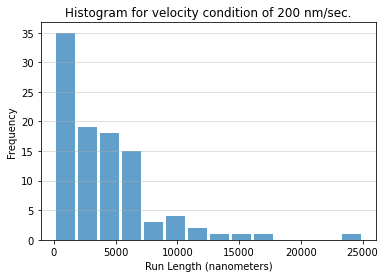

In [6]:
#mean velocity 200 nm/sec for each individual motor
#on-rate is constant
#off-rate is higher if velocity is higher because more steps must be taken in a given period of time
n = 100 # n is the number of runs to simulate
ts = 10000 # ts is the number of time steps in a second
MtrStepDecider = random.randrange(ts) #this will be used to determine if try to step
MtrDetachDecider = random.randrange(ts) #This is used to see if falls off
num_steps=[] #placeholder, empty list
distance_travelled=[] #placeholder, empty list
run_length=[] #placeholder, empty list
velocity=[] #placeholder, empty list
count_attachments=[]
step_size=8
step_thresh=25 # 100 for mean velocity 800 and processivity 800 for individu motor
detac_thresh=100 # 100 for mean velocity 800 and processivity 800 for individu motor
#for loop which runs simulation n times
for i in range(n):  #This is a loop which will go n times
    numtimesteps = 0
    Numsteps = 0
    Numsteps2 = 0
    MtrDetachDecider = 1000  #this makes sure you get into the while loop
    MtrDetachDecider2 = 1000
    count_attach=0
    while MtrDetachDecider >= detac_thresh or MtrDetachDecider2 >= detac_thresh:
        numtimesteps = numtimesteps + 1
        MtrStepDecider = random.randrange (ts)
        MtrStepDecider2 = random.randrange (ts)
        if MtrDetachDecider >= detac_thresh and MtrDetachDecider2 >= detac_thresh: #both motors attached
            if MtrStepDecider <= step_thresh and MtrStepDecider2 <= step_thresh:  #if true, then both motor is attempting to step
                MtrDetachDecider = random.randrange(ts)
                MtrDetachDecider2 = random.randrange(ts)
                if MtrDetachDecider > detac_thresh: 
                    Numsteps = Numsteps + 1
                if MtrDetachDecider2 > detac_thresh: 
                    Numsteps2 = Numsteps2 + 1
            elif MtrStepDecider <= step_thresh and MtrStepDecider2 > step_thresh: #just one will step
                MtrDetachDecider = random.randrange(ts)
                if MtrDetachDecider > detac_thresh: #if either steps i will add a step
                    Numsteps = Numsteps + 1
            elif MtrStepDecider2 <= step_thresh and MtrStepDecider > step_thresh: #just two will step
                MtrDetachDecider2 = random.randrange(ts)
                if MtrDetachDecider2 > detac_thresh: #if either steps i will add a step
                    Numsteps2 = Numsteps2 + 1
        elif MtrDetachDecider >= detac_thresh and MtrDetachDecider2 < detac_thresh: #motor1 attached, motor2 not
            if MtrStepDecider <= step_thresh:  #if true, then motor1 is attempting to step
                MtrDetachDecider = random.randrange(ts)
                if MtrDetachDecider >= detac_thresh:
                    Numsteps = Numsteps + 1
            MtrAttachDecider2 = random.randrange(ts)
            if MtrAttachDecider2 < 2: #2 chances per sec
                count_attach=count_attach+1
                MtrDetachDecider2 = 1000 
                Numsteps2=Numsteps
        else: #motor2 attached, motor1 not
            if MtrStepDecider2 <= step_thresh:  #if true, then motor1 is attempting to step
                MtrDetachDecider2 = random.randrange(ts)
                if MtrDetachDecider2 >= detac_thresh:
                    Numsteps2 = Numsteps2 + 1
            MtrAttachDecider = random.randrange(ts)
            if MtrAttachDecider < 2: #2 chances per sec
                count_attach=count_attach+1
                MtrDetachDecider = 1000 
                Numsteps=Numsteps2
    num_steps.append((Numsteps+Numsteps2)/2) #append num steps for this iteration i to list
    distance_travelled.append((Numsteps+Numsteps2)/2*step_size) #append dist travelled for this iteration i to list
    run_length.append(numtimesteps/10000)
    count_attachments.append(count_attach)
    velocity.append(((Numsteps+Numsteps2)/2*step_size)/(numtimesteps/10000)) #append velocity for this iteration i to list
mean_velocity=np.mean(velocity)
#print("average velocity is ",mean_velocity," nm/sec")
mean_distance=np.mean(distance_travelled)
print("average length of time of each run is ",np.mean(run_length),"seconds")
mean_at=np.mean(count_attachments)
print("average times reattached per run is ",mean_at," times.")
#calculate 95% CI
t = stats.t.ppf(1-((100-95)/2/100), n-1) #calculate t value for this SRS
CIlow=np.mean(distance_travelled)-t*np.std(distance_travelled,ddof=1)/(n**.5)
CIhigh=np.mean(distance_travelled)+t*np.std(distance_travelled,ddof=1)/(n**.5)
print("mean run length is ",mean_distance,"nm")
print("95% CI of run length is ",CIlow," and ",CIhigh," nanometers.")
#make histogram below
m, bins, patches = plt.hist(x=distance_travelled, bins='auto', alpha=0.7, rwidth=0.85) #choose bins automatically
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Run Length (nanometers)')
plt.ylabel('Frequency')
plt.title('Histogram for velocity condition of 200 nm/sec.')
maxfreq = m.max()

In [7]:
#order of magnitude estimate
velocity=200 #nm/s
av_time=800/velocity
off_rate=1/av_time
deltaT=0.5
prob_detac=off_rate*deltaT
prob_end=2*prob_detac
est_cycles=1/prob_end
est_run_length=400*est_cycles
print("According to our back of the envelope calculation the estimated run length for ",velocity," nm/s velocity is ",est_run_length," nm.")

According to our back of the envelope calculation the estimated run length for  200  nm/s velocity is  1600.0  nm.


average length of time of each run is  58.540898000000006 seconds
average times reattached per run is  12.65  times.
mean run length is  6011.28 nm
95% CI of run length is  4696.056507188183  and  7326.503492811817  nanometers.


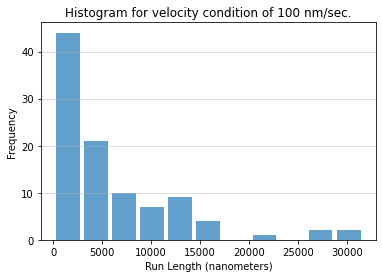

In [8]:
#mean velocity 100 nm/sec for each individual motor
#on-rate is constant
#off-rate is higher if velocity is higher because more steps must be taken in a given period of time
n = 100 # n is the number of runs to simulate
ts = 10000 # ts is the number of time steps in a second
MtrStepDecider = random.randrange(ts) #this will be used to determine if try to step
MtrDetachDecider = random.randrange(ts) #This is used to see if falls off
num_steps=[] #placeholder, empty list
distance_travelled=[] #placeholder, empty list
run_length=[] #placeholder, empty list
velocity=[] #placeholder, empty list
count_attachments=[]
step_size=8
step_thresh=12.5 # 100 for mean velocity 800 and processivity 800 for individu motor
detac_thresh=100 # 100 for mean velocity 800 and processivity 800 for individu motor
#for loop which runs simulation n times
for i in range(n):  #This is a loop which will go n times
    numtimesteps = 0
    Numsteps = 0
    Numsteps2 = 0
    MtrDetachDecider = 1000  #this makes sure you get into the while loop
    MtrDetachDecider2 = 1000
    count_attach=0
    while MtrDetachDecider >= detac_thresh or MtrDetachDecider2 >= detac_thresh:
        numtimesteps = numtimesteps + 1
        MtrStepDecider = random.randrange (ts)
        MtrStepDecider2 = random.randrange (ts)
        if MtrDetachDecider >= detac_thresh and MtrDetachDecider2 >= detac_thresh: #both motors attached
            if MtrStepDecider <= step_thresh and MtrStepDecider2 <= step_thresh:  #if true, then both motor is attempting to step
                MtrDetachDecider = random.randrange(ts)
                MtrDetachDecider2 = random.randrange(ts)
                if MtrDetachDecider > detac_thresh: 
                    Numsteps = Numsteps + 1
                if MtrDetachDecider2 > detac_thresh: 
                    Numsteps2 = Numsteps2 + 1
            elif MtrStepDecider <= step_thresh and MtrStepDecider2 > step_thresh: #just one will step
                MtrDetachDecider = random.randrange(ts)
                if MtrDetachDecider > detac_thresh: #if either steps i will add a step
                    Numsteps = Numsteps + 1
            elif MtrStepDecider2 <= step_thresh and MtrStepDecider > step_thresh: #just two will step
                MtrDetachDecider2 = random.randrange(ts)
                if MtrDetachDecider2 > detac_thresh: #if either steps i will add a step
                    Numsteps2 = Numsteps2 + 1
        elif MtrDetachDecider >= detac_thresh and MtrDetachDecider2 < detac_thresh: #motor1 attached, motor2 not
            if MtrStepDecider <= step_thresh:  #if true, then motor1 is attempting to step
                MtrDetachDecider = random.randrange(ts)
                if MtrDetachDecider >= detac_thresh:
                    Numsteps = Numsteps + 1
            MtrAttachDecider2 = random.randrange(ts)
            if MtrAttachDecider2 < 2: #2 chances per sec
                count_attach=count_attach+1
                MtrDetachDecider2 = 1000 
                Numsteps2=Numsteps
        else: #motor2 attached, motor1 not
            if MtrStepDecider2 <= step_thresh:  #if true, then motor1 is attempting to step
                MtrDetachDecider2 = random.randrange(ts)
                if MtrDetachDecider2 >= detac_thresh:
                    Numsteps2 = Numsteps2 + 1
            MtrAttachDecider = random.randrange(ts)
            if MtrAttachDecider < 2: #2 chances per sec
                count_attach=count_attach+1
                MtrDetachDecider = 1000 
                Numsteps=Numsteps2
    num_steps.append((Numsteps+Numsteps2)/2) #append num steps for this iteration i to list
    distance_travelled.append((Numsteps+Numsteps2)/2*step_size) #append dist travelled for this iteration i to list
    run_length.append(numtimesteps/10000)
    count_attachments.append(count_attach)
    velocity.append(((Numsteps+Numsteps2)/2*step_size)/(numtimesteps/10000)) #append velocity for this iteration i to list
mean_velocity=np.mean(velocity)
#print("average velocity is ",mean_velocity," nm/sec")
mean_distance=np.mean(distance_travelled)
print("average length of time of each run is ",np.mean(run_length),"seconds")
mean_at=np.mean(count_attachments)
print("average times reattached per run is ",mean_at," times.")
#calculate 95% CI
t = stats.t.ppf(1-((100-95)/2/100), n-1) #calculate t value for this SRS
CIlow=np.mean(distance_travelled)-t*np.std(distance_travelled,ddof=1)/(n**.5)
CIhigh=np.mean(distance_travelled)+t*np.std(distance_travelled,ddof=1)/(n**.5)
print("mean run length is ",mean_distance,"nm")
print("95% CI of run length is ",CIlow," and ",CIhigh," nanometers.")
#make histogram below
m, bins, patches = plt.hist(x=distance_travelled, bins='auto', alpha=0.7, rwidth=0.85) #choose bins automatically
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Run Length (nanometers)')
plt.ylabel('Frequency')
plt.title('Histogram for velocity condition of 100 nm/sec.')
maxfreq = m.max()

In [9]:
#order of magnitude estimate
velocity=100 #nm/s
av_time=800/velocity
off_rate=1/av_time
deltaT=0.5
prob_detac=off_rate*deltaT
prob_end=2*prob_detac
est_cycles=1/prob_end
est_run_length=400*est_cycles
print("According to our back of the envelope calculation the estimated run length for ",velocity," nm/s velocity is ",est_run_length," nm.")

According to our back of the envelope calculation the estimated run length for  100  nm/s velocity is  3200.0  nm.
